#  Customer Churn Rate Analysis

### This project focuses on analyzing customer churn rate to help businesses understand why customers are leaving and take proactive measures to reduce churn and retain valuable customers.

In [258]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [259]:
df = pd.read_csv("Churn_Data.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [260]:
df.drop('customerID',axis = 'columns',inplace=True)

In [261]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [262]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [263]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [264]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [265]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [266]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [267]:
df1.TotalCharges.dtypes

dtype('float64')

# Visual

In [268]:
tensure_churn_no = df1[df1.Churn == 'No'].tenure
tensure_churn_yes = df1[df1.Churn == 'Yes'].tenure

tensure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

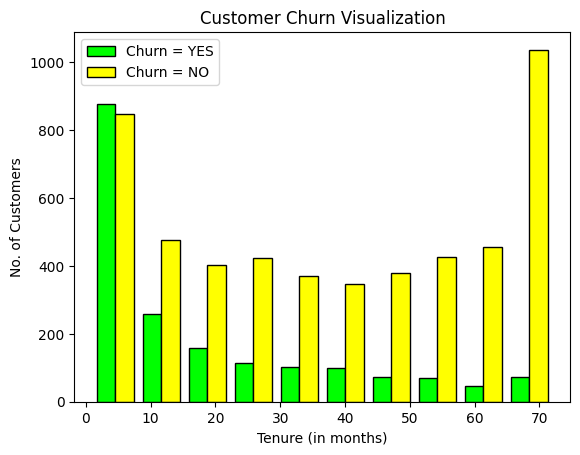

In [269]:
plt.xlabel('Tenure (in months)')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Visualization')

plt.hist([tensure_churn_yes,tensure_churn_no], color = ['lime','yellow'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

In [270]:
churn_count_yes = df1['Churn'].value_counts()['Yes']
churn_count_yes

1869

In [271]:
churn_count_no = df1['Churn'].value_counts()['No']
churn_count_no 

5163

Text(0.5, 1.0, 'Churn Status')

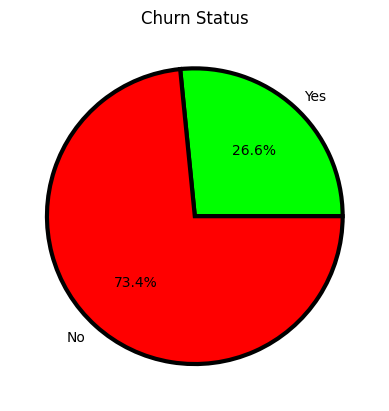

In [272]:
labels = ['Yes', 'No']
sizes = [churn_count_yes , churn_count_no ]
colors = ['lime','red']

plt.pie(sizes,labels=labels, colors = colors, autopct='%1.1f%%',
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 3})

plt.title('Churn Status')

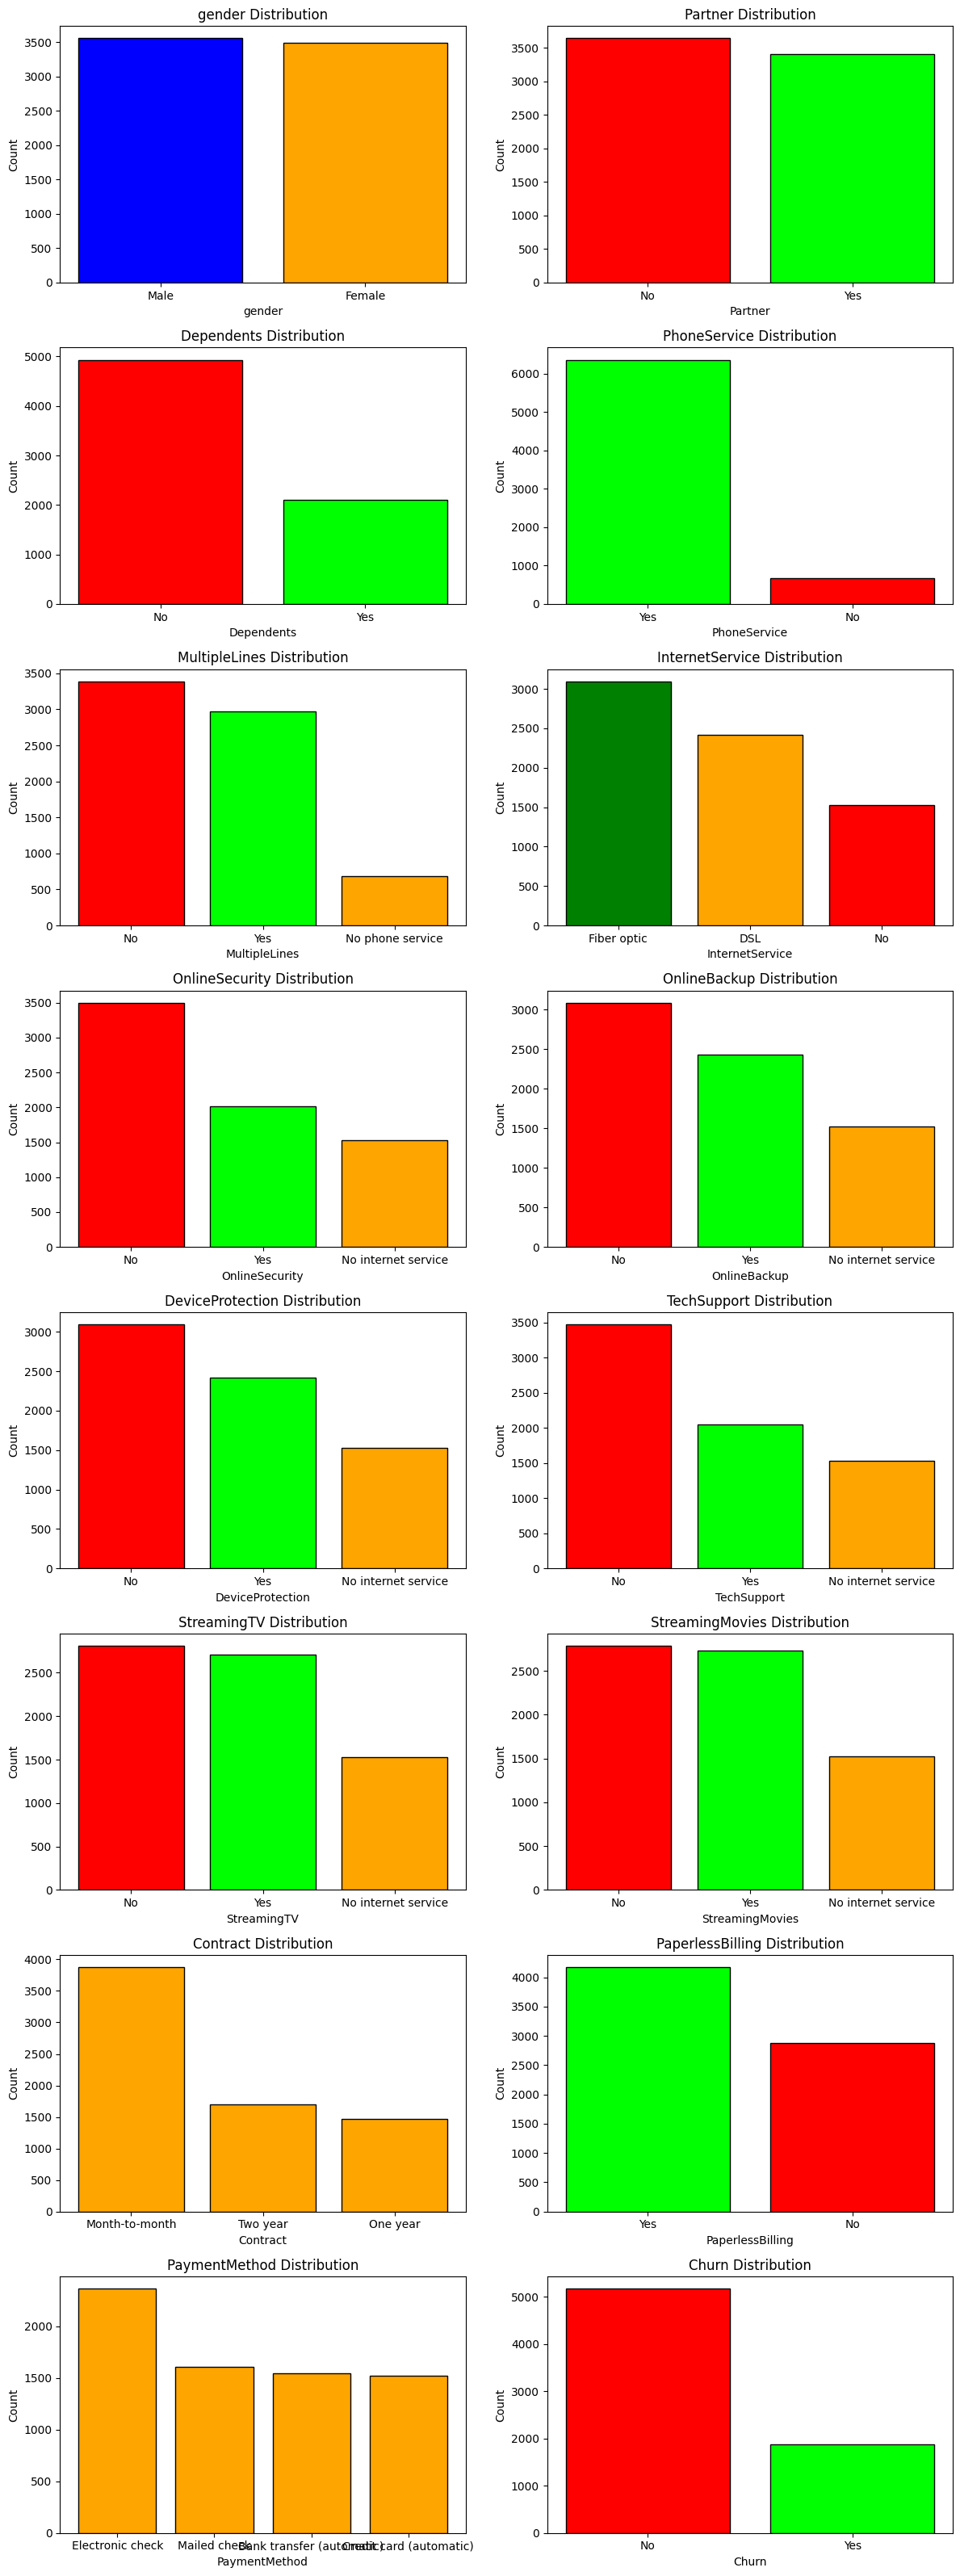

In [273]:
categorical_variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod','Churn']



n_cols = 2
n_rows = (len(categorical_variables) + 1) // n_cols

fig_width = 6 * n_cols
fig_height = 4 * n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axes = axes.flatten() 

for i, variable in enumerate(categorical_variables):
    variable_count = df[variable].value_counts()
    colors = ['red' if value == 'No' else 'lime' if value == 'Yes' else 'blue' if value == 'Male' else 'green' if value == 'Fiber optic' else 'orange' for value in variable_count.index]
    axes[i].bar(variable_count.index, variable_count.values, color=colors,edgecolor='black')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{variable} Distribution')


plt.tight_layout()
plt.show()

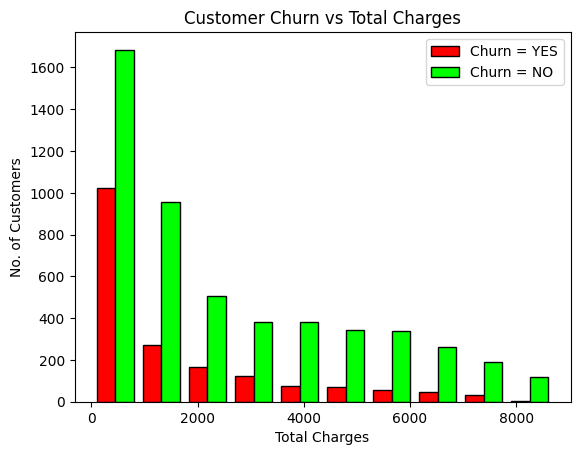

In [274]:
TotalCharges_churn_no = df1[df1.Churn == 'No'].TotalCharges
TotalCharges_churn_yes = df1[df1.Churn == 'Yes'].TotalCharges

plt.xlabel('Total Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn vs Total Charges')

plt.hist([TotalCharges_churn_yes,TotalCharges_churn_no], color = ['red','lime'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

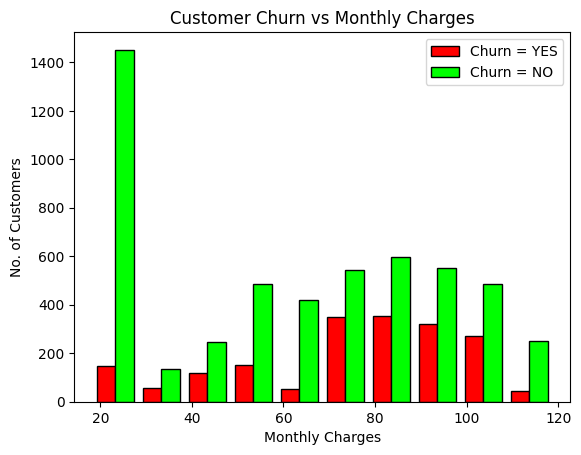

In [275]:
MonthlyCharges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn vs Monthly Charges')

plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no], color = ['red','lime'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

# Encoding

In [276]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [277]:

for col in df:
    if df[col].dtypes == 'object':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [278]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [279]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [280]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3172\477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [281]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [282]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\4027547381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [283]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [284]:
df1['gender'].replace({'Female':1,'Male':0},inplace = True)
df1['gender']

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\80411562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace = True)


0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [285]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [286]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5813,0,0,1,1,48,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5134,0,1,0,0,15,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6198,0,0,1,1,25,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [287]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [288]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [289]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2630,0,0,1,0,0.873239,1,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2507,0,0,1,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4743,0,0,1,0,0.774648,1,1,0,1,1,...,1,0,0,0,0,1,0,1,0,0
5433,0,0,0,0,0.760563,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


In [290]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [291]:
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [292]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)

In [293]:
x_train.shape

(5625, 26)

In [294]:
x_test.shape

(1407, 26)

In [295]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [296]:
len(x_train.columns)

26

#  Data Model Building

In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [299]:
model_params = {
     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },   
}

In [300]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.772566,{'n_estimators': 10}
1,logistic_regression,0.800000,{'C': 10}
2,naive_bayes_gaussian,0.745984,{}
3,decision_tree,0.727932,{'criterion': 'entropy'}


In [301]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train,y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5178 - accuracy: 0.7493
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4098 - accura

# Selecting the model with best score for the dataset

In [302]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7811


[0.45052647590637207, 0.7810945510864258]

In [303]:
ans = model.predict(x_test)
ans[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.31284022],
       [0.4236893 ],
       [0.01274624],
       [0.82511157],
       [0.46936253],
       [0.7598225 ],
       [0.09735063],
       [0.45993063],
       [0.46356156],
       [0.22269613]], dtype=float32)

In [304]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [305]:
y_pred = []

for ele in ans:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [306]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [307]:
corr_matrix = df2.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,0.010349,0.005285,0.007515,0.008883,0.016328,0.013093,0.000807,0.008507,0.007124,0.010105,0.011902,0.013779,0.000048,0.008545,0.007584,0.011189,0.004745,0.003251,0.007755,0.003603,0.015973,0.001632,0.000844,0.013199
SeniorCitizen,0.001819,1.000000,0.016957,0.210550,0.015683,0.008392,0.142996,0.038576,0.066663,0.059514,0.060577,0.105445,0.119842,0.156258,0.219874,0.102411,0.150541,0.108276,0.254923,0.182519,0.137752,0.046491,0.116205,0.016235,0.024359,0.171322,0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.013957,0.097825,0.319072,0.149982,0.001043,0.001235,0.000286,0.280202,0.083067,0.247334,0.111406,0.082327,0.083207,0.096948
Dependents,0.010349,0.210550,0.452269,1.000000,0.163386,0.001078,0.024307,0.080786,0.023639,0.013900,0.063053,0.016499,0.038375,0.110131,0.112343,0.064653,0.163128,0.051593,0.164101,0.138383,0.229715,0.069222,0.201699,0.052369,0.061134,0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,0.825880,0.354049,0.013786,0.017930,0.037529,0.649346,0.202338,0.563801,0.243822,0.232800,0.210197,0.232181
PhoneService,0.007515,0.008392,0.018397,0.001078,0.007877,1.000000,0.279530,0.091676,0.052133,0.070076,0.095138,0.021383,0.033477,0.016696,0.248033,0.113008,0.011691,0.452255,0.290183,0.171817,0.001243,0.003142,0.004442,0.008271,0.006916,0.002747,0.004463
MultipleLines,0.008883,0.142996,0.142561,0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.163746,0.490912,0.469042,0.040033,0.200318,0.366420,0.210794,0.088558,0.003594,0.106618,0.075429,0.060319,0.083583,0.227672
OnlineSecurity,0.016328,0.038576,0.143346,0.080786,0.328297,0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.004051,0.296447,0.412619,0.171270,0.320343,0.030506,0.332799,0.246844,0.100658,0.191698,0.094366,0.115473,0.112295,0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,0.510100,0.082307,0.156765,0.165940,0.380990,0.164393,0.084113,0.111391,0.086942,0.090455,0.000364,0.174075
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,0.522881,0.066193,0.145150,0.176356,0.380151,0.225988,0.102911,0.165248,0.083047,0.111252,0.003308,0.187325


# Importing Confusion Matrx

Text(95.72222222222221, 0.5, 'Truth')

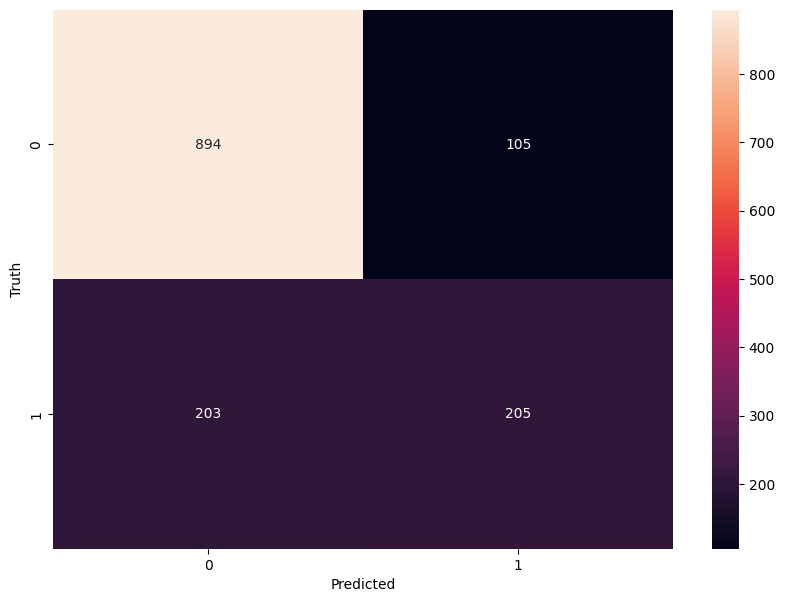

In [308]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#  Importing Classification Report

In [309]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.66      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [310]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7810945273631841

### In the end we conclude that the Telecom Customer Churn Prediction was best worked with an accuracy score of 78.46%